In [1]:
import os
import glob
import numpy as np
import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from importlib import reload

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
datafileu = "/data/Wind/SCOW/wind_stress_zonal_monthly_maps.nc"
datafilev = "/data/Wind/SCOW/wind_stress_meridional_monthly_maps.nc"

In [3]:
def get_wind_stress(datafile, coordinates=None):
    with netCDF4.Dataset(datafile, "r") as nc:
        lat = nc.variables["latitude"][:]
        lon = nc.variables["longitude"][:]
        lon[lon>180.] = lon[lon>180.] - 360.
        
        if coordinates is not None:
            goodlon = np.where( (lon<= coordinates[1]) & (lon>= coordinates[0]))[0]
            goodlat = np.where( (lat<= coordinates[3]) & (lat>= coordinates[2]))[0]
            lon = lon[goodlon]
            lat = lat[goodlat]
        windstress = np.empty((len(lat), len(lon), 12))
        windstress_vars = nc.get_variables_by_attributes(units="N/m^2")
        for i in range(0, 12):
            if coordinates is not None:
                windstress[:,:,i] = windstress_vars[i][goodlat, goodlon]
            else:
                windstress[:,:,i] = windstress_vars[i][:, :]
        windstress = np.ma.masked_where(windstress==-9999.0, windstress)
    return lon, lat, windstress

In [4]:
m = Basemap(projection='ortho',lon_0=-25.,lat_0=0,resolution='c')
m2 = Basemap(projection='ortho',lon_0=-125.,lat_0=0,resolution='c')

In [5]:
ebuscoordinates = [(-30., -10., 15., 35.),
                   (-138., -120., 30., 45.),
                   (-85., -70., -35., -15.),
                   (6., 20., -35., -15.)
                  ]

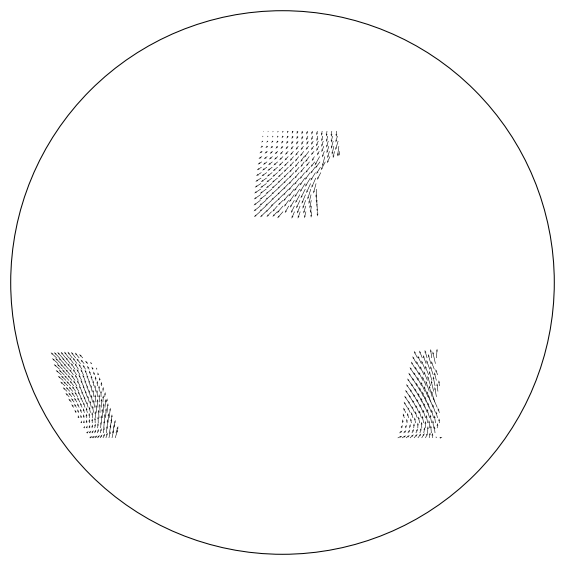

In [6]:
N = 5
fig = plt.figure(figsize=(10, 10))

for coords in ebuscoordinates:
    lon, lat, ustress = get_wind_stress(datafileu, coords)
    lon, lat, vstress = get_wind_stress(datafilev, coords)
    llon, llat = np.meshgrid(lon, lat)
    lonp, latp = m(llon, llat)
    m.quiver(lonp[::N,::N], latp[::N,::N], 
             np.nanmean(ustress, axis=2)[::N,::N], 
             np.nanmean(vstress, axis=2)[::N,::N], scale=5, width=.001)
#plt.savefig("failedwind2", dpi=200, bbox_inches="tight")
plt.show()
plt.close()

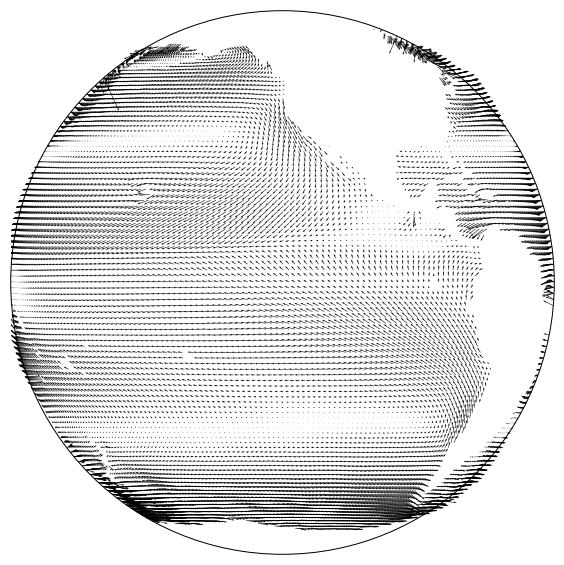

In [8]:
N = 5
fig = plt.figure(figsize=(10, 10))

for coords in ebuscoordinates:
    lon, lat, ustress = get_wind_stress(datafileu, coords)
    lon, lat, vstress = get_wind_stress(datafilev, coords)
    llon, llat = np.meshgrid(lon, lat)
    lonp, latp = m2(llon, llat)
    m2.quiver(lonp[::N,::N], latp[::N,::N], 
             np.nanmean(ustress, axis=2)[::N,::N], 
             np.nanmean(vstress, axis=2)[::N,::N], scale=5, width=.001)
#plt.savefig("failedwind2", dpi=200, bbox_inches="tight")
plt.show()
plt.close()

### Global coverage

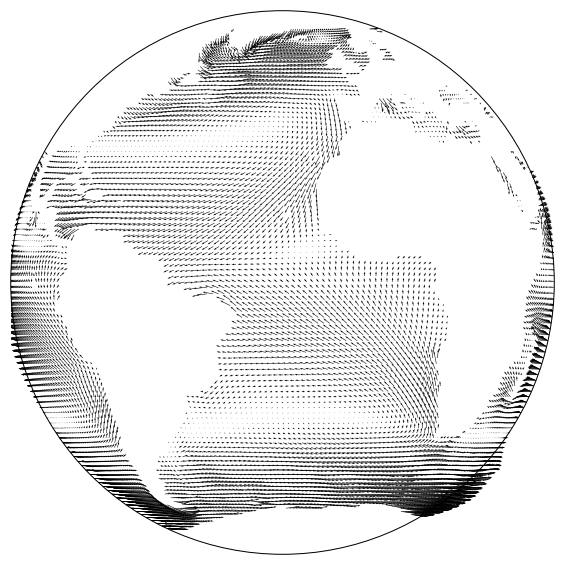

In [10]:
N = 5
fig = plt.figure(figsize=(10, 10))

coords = (-100., 100., -89., 89.)
lon, lat, ustress = get_wind_stress(datafileu, coords)
lon, lat, vstress = get_wind_stress(datafilev)
llon, llat = np.meshgrid(lon, lat)
lonp, latp = m(llon, llat)
m.quiver(lonp[::N,::N], latp[::N,::N], 
         np.nanmean(ustress, axis=2)[::N,::N], 
         np.nanmean(vstress, axis=2)[::N,::N], scale=5, width=.001)
#plt.savefig("failedwind2", dpi=200, bbox_inches="tight")
plt.show()
plt.close()